# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Cluster based Incentivization

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
path = "driver-data.csv"
df = pd.read_csv(path)
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
from sklearn.cluster import KMeans

In [6]:
df_analyze = df.drop('id',axis=1)
df_analyze

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


#  Cluster with Centers

In [15]:
model = KMeans(n_clusters=2)
model.fit(df_analyze)

KMeans(n_clusters=2)

In [8]:
model.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529]])

In [9]:
print("model.labels:", model.labels_)

print("Len model.labels:", len(model.labels_)   )
print("model.labels type: ", type(model.labels_)   )

model.labels: [3 3 3 ... 2 2 2]
Len model.labels: 4000
model.labels type:  <class 'numpy.ndarray'>


In [10]:
unique,counts = np.unique(model.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 2775, 1: 104, 2: 696, 3: 425}


In [11]:
df_analyze['cluster'] = model.labels_
df_analyze

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3
...,...,...,...
3995,160.04,10,2
3996,176.17,5,2
3997,170.91,12,2
3998,176.14,5,2


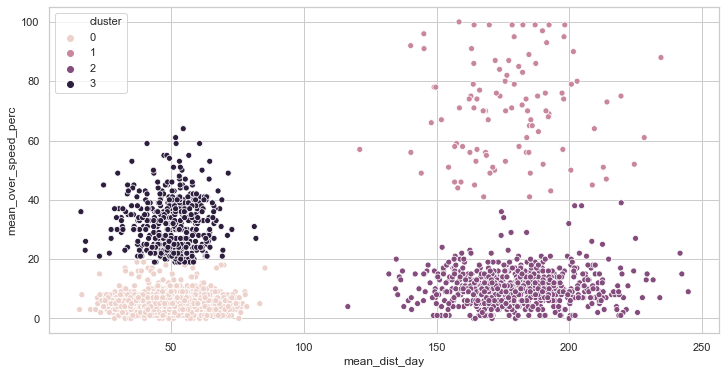

In [14]:
sns.set_style('whitegrid')

sns.scatterplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster')

# With 4 clusters

In [21]:
model = KMeans(n_clusters=4)
model.fit(df_analyze)

KMeans(n_clusters=4)

In [22]:
model.cluster_centers_

array([[1.77835096e+02, 7.02884615e+01, 1.00000000e+00],
       [4.99842847e+01, 5.21441441e+00, 5.77315973e-15],
       [1.80343118e+02, 1.05201149e+01, 2.00000000e+00],
       [5.04612706e+01, 3.24282353e+01, 3.00000000e+00]])

In [23]:
print("model.labels:", model.labels_)

print("Len model.labels:", len(model.labels_)   )
print("model.labels type: ", type(model.labels_)   )

model.labels: [3 3 3 ... 2 2 2]
Len model.labels: 4000
model.labels type:  <class 'numpy.ndarray'>


In [24]:
unique,counts = np.unique(model.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 104, 1: 2775, 2: 696, 3: 425}


In [25]:
df_analyze['cluster'] = model.labels_
df_analyze

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3
...,...,...,...
3995,160.04,10,2
3996,176.17,5,2
3997,170.91,12,2
3998,176.14,5,2


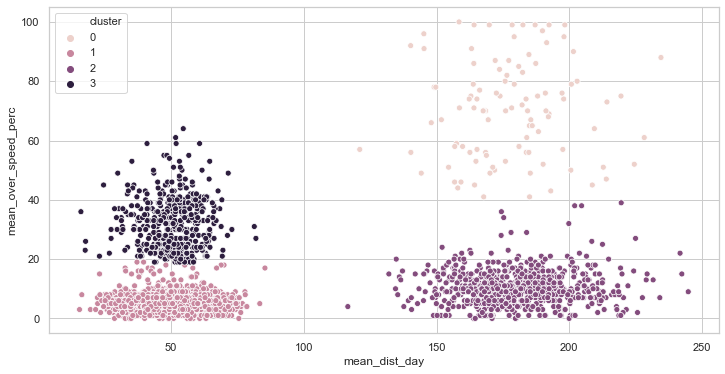

In [26]:
sns.set_style('whitegrid')

sns.scatterplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster')